# Plot pannel a

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.stats import gaussian_kde

In [5]:
%matplotlib inline

In [ ]:
metadata = pd.read_excel("https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE243256&format=file&file=GSE243256%5FZEPA%5Fmetadata%2Exlsx", index_col = 0)

In [9]:
metadata.columns

Index(['cell_names', 'cell_barcodes', 'FRIP', 'Main_Celltypes',
       'DoubletEnrichment', 'DoubletScore', 'nFrags', 'technology',
       'TSSEnrichment', 'noBatchcorrection.UMAP1', 'noBatchcorrection.UMAP2',
       'Batchcorrection.UMAP1', 'Batchcorrection.UMAP2', 'time.tSNE_1',
       'time.tSNE_2', 'sample', 'cell_type', 'stage', 'experimental_batch'],
      dtype='object')

In [28]:
norm = matplotlib.colors.Normalize(vmin = 0, vmax = len(set(metadata["stage"])))
mapper = matplotlib.cm.ScalarMappable(norm = norm, cmap = "Spectral_r")
state_to_color = {
    stage: mapper.to_rgba(i)
    for i, stage in enumerate(sorted(set(metadata["stage"]), key = lambda x: int(x.replace("hpf", ""))))
}

In [54]:
cell_types_of_interest = [
    "Cardiac muscle", "Slow muscle cells", "Slow muscle cell", "Fast muscle cells", "Endothelial"
]
cell_types_of_interest_full = [
    x for x in set(metadata["cell_type"])
    if x.split(":")[1] in cell_types_of_interest
]

/data/tmp/30011/ipykernel_577367/550142247.py:37: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()


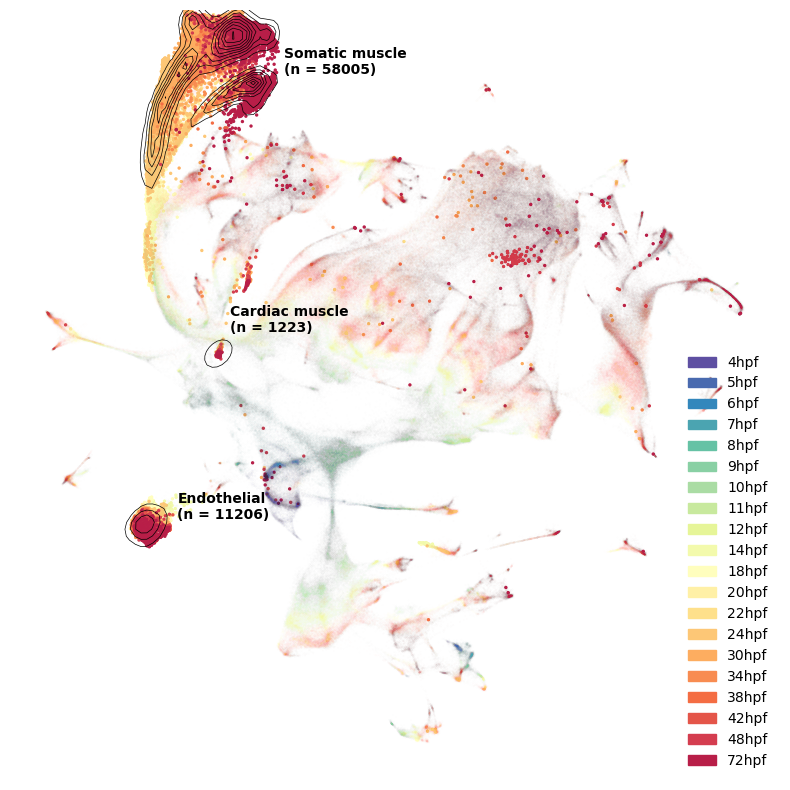

In [112]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(
    metadata.query("cell_type in @cell_types_of_interest_full")["Batchcorrection.UMAP1"],
    metadata.query("cell_type in @cell_types_of_interest_full")["Batchcorrection.UMAP2"],
    c = [state_to_color[s] for s in metadata.query("cell_type in @cell_types_of_interest_full")["stage"]],
    s = 2
)
ax.scatter(
    metadata.query("cell_type not in @cell_types_of_interest_full")["Batchcorrection.UMAP1"],
    metadata.query("cell_type not in @cell_types_of_interest_full")["Batchcorrection.UMAP2"],
    s = 0.1,
    c = [state_to_color[s] for s in metadata.query("cell_type not in @cell_types_of_interest_full")["stage"]],
    alpha = 0.01
)
for cell_types, name in zip(
        [["Slow muscle cells", "Slow muscle cell", "Fast muscle cells"], ["Endothelial"], ["Cardiac muscle"]],
        ["Somatic muscle", "Endothelial", "Cardiac muscle"]):
    cell_types_full = [
        x for x in set(metadata["cell_type"])
        if x.split(":")[1] in cell_types
    ]
    X = metadata.query("cell_type in @cell_types_full")["Batchcorrection.UMAP1"]
    Y = metadata.query("cell_type in @cell_types_full")["Batchcorrection.UMAP2"]
    xmin, xmax = X.min(), X.max()
    ymin, ymax = Y.min(), Y.max()
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([X, Y])
    kernel = gaussian_kde(values)
    z = np.reshape(kernel(positions).T, xx.shape)
    CS = ax.contour(xx, yy, z, levels=int(X.shape[0] / 5000) + 1, colors = "black", alpha=1, linewidths=0.5)
    ax.text(X.mean() + (3 if name == "Somatic muscle" else 1 if name == "Endothelial" else 0), Y.mean(), name + f"\n(n = {X.shape[0]})", weight = "bold")
patches = [matplotlib.patches.Patch(color=color, label=name) 
          for name, color in state_to_color.items()]
ax.legend(handles = patches, frameon = False)
ax.set_axis_off()
fig.tight_layout()
plt.show(fig)

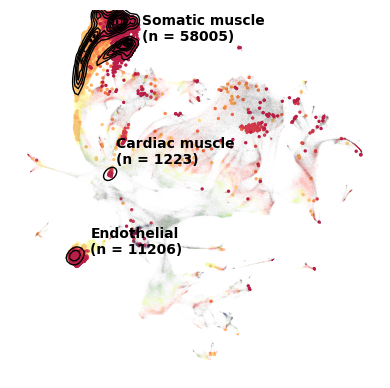

In [123]:
fig, ax = plt.subplots(figsize = (4, 4))
ax.scatter(
    metadata.query("cell_type in @cell_types_of_interest_full")["Batchcorrection.UMAP1"],
    metadata.query("cell_type in @cell_types_of_interest_full")["Batchcorrection.UMAP2"],
    c = [state_to_color[s] for s in metadata.query("cell_type in @cell_types_of_interest_full")["stage"]],
    s = 2
)
ax.scatter(
    metadata.query("cell_type not in @cell_types_of_interest_full")["Batchcorrection.UMAP1"],
    metadata.query("cell_type not in @cell_types_of_interest_full")["Batchcorrection.UMAP2"],
    s = 0.01,
    c = [state_to_color[s] for s in metadata.query("cell_type not in @cell_types_of_interest_full")["stage"]],
    alpha = 0.01
)
for cell_types, name in zip(
        [["Slow muscle cells", "Slow muscle cell", "Fast muscle cells"], ["Endothelial"], ["Cardiac muscle"]],
        ["Somatic muscle", "Endothelial", "Cardiac muscle"]):
    cell_types_full = [
        x for x in set(metadata["cell_type"])
        if x.split(":")[1] in cell_types
    ]
    X = metadata.query("cell_type in @cell_types_full")["Batchcorrection.UMAP1"]
    Y = metadata.query("cell_type in @cell_types_full")["Batchcorrection.UMAP2"]
    xmin, xmax = X.min(), X.max()
    ymin, ymax = Y.min(), Y.max()
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([X, Y])
    kernel = gaussian_kde(values)
    z = np.reshape(kernel(positions).T, xx.shape)
    CS = ax.contour(xx, yy, z, levels=int(X.shape[0] / 6000) + 1, colors = "black", alpha=1, linewidths=1)
    ax.text(X.mean() + (3 if name == "Somatic muscle" else 1 if name == "Endothelial" else 0), Y.mean(), name + f"\n(n = {X.shape[0]})", weight = "bold")
patches = [matplotlib.patches.Patch(color=color, label=name) 
          for name, color in state_to_color.items()]
#ax.legend(handles = patches, frameon = False)
ax.set_axis_off()
fig.tight_layout()
plt.show(fig)

In [124]:
fig.savefig("dimred.png", dpi = 500, pad_inches=0)

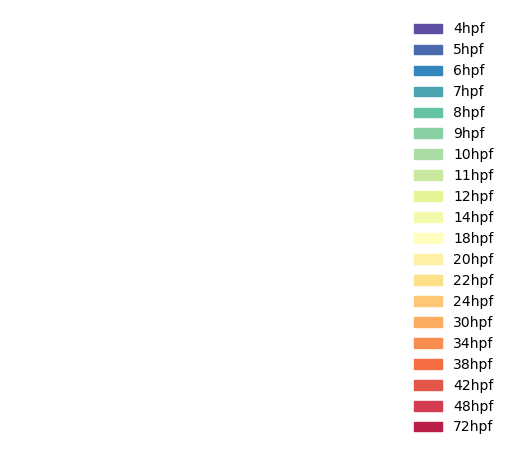

In [117]:
fig, ax = plt.subplots()
patches = [matplotlib.patches.Patch(color=color, label=name) 
          for name, color in state_to_color.items()]
ax.legend(handles = patches, frameon = False)
ax.set_axis_off()
plt.show(fig)
fig.savefig("dim_red_legend.pdf")